# **Table of Contents**

### **1. Introduction**

### **2. Importing Libraries**

### **3. Importing and Inspection of Dataset**

### **4. Exploratory Data Analysis**

### **5. Data Pre-processing**

### **6. Model Building**

   - **Ridge Regression**  
   
   - **Random Forest Regressor**  

   - **Boosting with XGBoost**  

   - **Feedforward Neural Network**  

### **7. Final Evaluation**

# **Introduction**

As a university student, we often struggle with balancing our many commitments and priorities: academics, social life, sleep, extracirricular commitments, relationships, and many more. Academics is a top priority for many as it should, making our portfolio look better and opening more doors in the working world. In a bid to improve our GPA, we often neglect essential parts of our life, be it exercise, sleep and mental health. But are these sacrifices truly a need or are we simply sabotaging ourselves?

In this project, I aim to answer the question: How do our lifestyle choices affect our academic performance as university students? To do so, I will be analysing a dataset, "Student Insomnia and Educational Outcomes Dataset" by Akik Abdullah (2024) which investigates the relationship between insomnia and educational outcomes in university students. I have chosen this dataset as the lifestyle factors in the study are often the ones that are sacrificed as academics become a priority which will be covered later in this report.

# **Importing Libraries**

In this section, the necessary Python libraries are imported here. They are group into the following categories based on their purpose as such:

1. **Data Manipulation and Preprocessing**:
   - `pandas` and `numpy` are imported for handling data structures and performing numerical operations.
   - `os`, `time`, and `random` assist in file handling, time tracking, and randomization.

2. **Data Visualization**:
   - `matplotlib` and `seaborn` are imported for creating plots to visualize the data and model results .

3. **Regression Models**:
   - `LinearRegression`, `RandomForestRegressor`, and `XGBRegressor` are commonly used regression models for predictive modeling.

4. **Data Preprocessing**:
   - Preprocessing tools from `scikit-learn` are used to split data (`train_test_split`), standardize features (`StandardScaler`), and handle categorical data (`OneHotEncoder`).

5. **Metrics for Regression**:
   - `mean_squared_error`, `mean_absolute_error`, and `r2_score` are evaluation metrics used to assess model performance and quantify prediction accuracy.

6. **Hyperparameter Tuning**:
   - `GridSearchCV` is used for hyperparameter optimization, ensuring that the best parameters are selected for the regression models.
   - `learning_curve` helps visualize the model’s learning behavior.

7. **SHAP**:
   - `shap` are included for feature importance analysis, providing insights into which features contribute most to the model's predictions.

8. **Suppress Warnings**:
   - To ensure a cleaner output, `warnings` is used to suppress non-critical warnings related to model execution.
  
9. **Seed Setting**:
   - This ensure the data is reproducable for consistency in analysis and model evaluation

In [1]:
# Data manipulation and preprocessing
import pandas as pd
import numpy as np
import os
import time
import random

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Regression models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

# Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Metrics for regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV, learning_curve

# SHAP for advanced feature analysis
import shap

# To suppress warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.exceptions import UndefinedMetricWarning, DataConversionWarning, InconsistentVersionWarning

# Set the seed for reproducibility
seed_value = 42
np.random.seed(seed_value)
random.seed(seed_value)

/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# **Importing and Inspection of Dataset**

This dataset examines the sleep patterns, lifestyle factors, and academic performance of university students, capturing various behavioral and health indicators. Below is an overview of the key features:

- **Year of Study**: The academic year of the student, categorized into options such as "Graduate student," "Third year," "Second year," and "First year."
  
- **Gender**: The gender distribution of the students, categorized as "Male" or "Female."

  
- **Difficulty Falling Asleep**: Frequency of difficulty falling asleep at night, with responses ranging from "Never" to "Every night."

- **Average Hours of Sleep**: Self-reported average daily sleep duration, categorized into ranges such as "Less than 4 hours," "4-5 hours," "6-7 hours," "7-8 hours," and "More than 8 hours."

- **Nighttime Awakenings**: Frequency of waking up during the night and struggling to fall back asleep, ranging from "Never" to "Every night."

- **Sleep Quality**: Overall subjective rating of sleep quality, categorized into "Very poor," "Poor," "Average," "Good," and "Very good."

- **Difficulty Concentrating**: Frequency of difficulty concentrating during lectures or studying due to lack of sleep, with responses such as "Never," "Rarely," "Sometimes," "Often," and "Always."

- **Daytime Fatigue**: Frequency of feeling fatigued during the day, affecting study or class attendance, categorized similarly to difficulty concentrating.

- **Skipping Classes**: Frequency of missing or skipping classes due to sleep-related issues, with responses ranging from "Never" to "Always."

- **Impact on Assignments**: Self-reported impact of insufficient sleep on the ability to complete assignments and meet deadlines, with categories like "No impact," "Minor impact," "Moderate impact," "Major impact," and "Severe impact."

- **Device Use Before Sleep**: Frequency of using electronic devices (e.g., phones, computers) before going to sleep, ranging from "Never" to "Every night."

- **Caffeine Consumption**: Frequency of consuming caffeinated beverages to stay awake or alert, categorized from "Never" to "Every day."

- **Physical Activity**: Frequency of engaging in physical activity or exercise, with responses like "Never," "Rarely," "Sometimes," "Often," and "Every day."

- **Stress Levels**: Self-reported stress levels related to academic workload, ranging from "No stress" to "Extremely high stress."

- **Academic Performance**: Overall academic performance (e.g., GPA or grades) in the past semester, categorized into "Poor," "Below average," "Average," "Good," and "Excellent."

As can be seen, most of the data are survey responses which have no numerical value attributed to them. As such, preprocessing will have to be performed to convert the responses into a manner which can be used for analysis.

In this part, there are 2 main steps:

1. Importing of the Dataset
2. `value_counts` were found so as to inspect the data
3. The columns are renamed for brevity for the Exploratory Data Analysis steps later.

In [2]:
# Replace 'student_sleep_patterns.csv' with the path to your CSV file
file_path = 'Student Insomnia and Educational Outcomes Dataset.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first 10 rows
print("First 10 rows of the dataset:")
print(df.head(10))

# Display value counts for each column in a more structured format
print("\nValue counts for each column:")

for column in df.columns:
    print(f"\n{'='*40}\nColumn: {column}\n{'='*40}")
    value_counts = df[column].value_counts()
    print(value_counts)
    print(f"{'='*40}")

First 10 rows of the dataset:
             Timestamp 1. What is your year of study? 2. What is your gender?  \
0  10/24/2024 16:51:15               Graduate student                    Male   
1  10/24/2024 16:51:51                     Third year                    Male   
2  10/24/2024 16:52:21                     First year                  Female   
3  10/24/2024 16:53:00                     Third year                    Male   
4  10/24/2024 16:53:25               Graduate student                    Male   
5  10/24/2024 16:53:53                    Second year                    Male   
6  10/24/2024 16:54:24                     Third year                    Male   
7  10/24/2024 16:54:50                     Third year                    Male   
8  10/24/2024 16:55:18                     Third year                    Male   
9  10/24/2024 16:56:33                     Third year                    Male   

  3. How often do you have difficulty falling asleep at night?   \
0          

In [3]:
# Rename the columns
df.columns = [
    "Timestamp",
    "Year_of_Study",
    "Gender",
    "Difficulty_Falling_Asleep",
    "Sleep_Hours",
    "Night_Waking_Frequency",
    "Sleep_Quality",
    "Difficulty_Concentrating",
    "Daytime_Fatigue",
    "Class_Skipping_Frequency",
    "Assignment_Impact",
    "Device_Use_Before_Sleep",
    "Caffeine_Consumption",
    "Physical_Activity",
    "Stress_Levels",
    "Academic_Performance"
]

# Display the first 10 rows after renaming the columns
print(df.head(10))

             Timestamp     Year_of_Study  Gender  \
0  10/24/2024 16:51:15  Graduate student    Male   
1  10/24/2024 16:51:51        Third year    Male   
2  10/24/2024 16:52:21        First year  Female   
3  10/24/2024 16:53:00        Third year    Male   
4  10/24/2024 16:53:25  Graduate student    Male   
5  10/24/2024 16:53:53       Second year    Male   
6  10/24/2024 16:54:24        Third year    Male   
7  10/24/2024 16:54:50        Third year    Male   
8  10/24/2024 16:55:18        Third year    Male   
9  10/24/2024 16:56:33        Third year    Male   

      Difficulty_Falling_Asleep        Sleep_Hours  \
0      Often (5-6 times a week)          7-8 hours   
1      Often (5-6 times a week)          7-8 hours   
2  Sometimes (3-4 times a week)          7-8 hours   
3      Often (5-6 times a week)  More than 8 hours   
4      Often (5-6 times a week)          7-8 hours   
5      Often (5-6 times a week)          7-8 hours   
6  Sometimes (3-4 times a week)          7-8 hour

# **Exploratory Data Analysis**

In this step, unnecessary columns were dropped, and the distribution of key features was analyzed. The Academic Performance variable showed a clear imbalance, with most students falling into the Poor and Below Average categories. This suggests that academic outcomes in the dataset are predominantly lower.

In [4]:
# Define the columns to drop
columns_to_drop = [
    "Timestamp", 
    "Year_of_Study", 
    "Difficulty_Falling_Asleep", 
    "Night_Waking_Frequency", 
    "Difficulty_Concentrating", 
    "Daytime_Fatigue", 
    "Class_Skipping_Frequency", 
    "Assignment_Impact"
]

# Drop the specified columns
df_clean = df.drop(columns=columns_to_drop)

# Display the DataFrame with remaining columns
print(df_clean)

# Display value counts for each remaining column
for col in df_clean.columns:
    print(f"Value counts for {col}:")
    print(df_clean[col].value_counts())
    print("\n")

     Gender        Sleep_Hours Sleep_Quality       Device_Use_Before_Sleep  \
0      Male          7-8 hours          Good      Often (5-6 times a week)   
1      Male          7-8 hours          Good  Sometimes (3-4 times a week)   
2    Female          7-8 hours          Good      Often (5-6 times a week)   
3      Male  More than 8 hours          Poor  Sometimes (3-4 times a week)   
4      Male          7-8 hours     Very good  Sometimes (3-4 times a week)   
..      ...                ...           ...                           ...   
786    Male  More than 8 hours     Very poor                   Every night   
787    Male  More than 8 hours          Poor                   Every night   
788    Male  More than 8 hours     Very poor      Often (5-6 times a week)   
789    Male          7-8 hours       Average                   Every night   
790    Male  More than 8 hours          Poor      Often (5-6 times a week)   

             Caffeine_Consumption             Physical_Activity


Distribution of Gender:
Male      572
Female    219
Name: Gender, dtype: int64

Distribution of Sleep_Hours:
7-8 hours            423
More than 8 hours    333
6-7 hours             24
4-5 hours              7
Less than 4 hours      4
Name: Sleep_Hours, dtype: int64

Distribution of Sleep_Quality:
Very poor    246
Very good    204
Good         170
Poor         125
Average       46
Name: Sleep_Quality, dtype: int64

Distribution of Device_Use_Before_Sleep:
Often (5-6 times a week)        431
Every night                     258
Sometimes (3-4 times a week)     76
Rarely (1-2 times a week)        24
Never                             2
Name: Device_Use_Before_Sleep, dtype: int64

Distribution of Caffeine_Consumption:
Often (5-6 times a week)        422
Every day                       273
Sometimes (3-4 times a week)     67
Rarely (1-2 times a week)        27
Never                             2
Name: Caffeine_Consumption, dtype: int64

Distribution of Physical_Activity:
Often (5-6 times a w

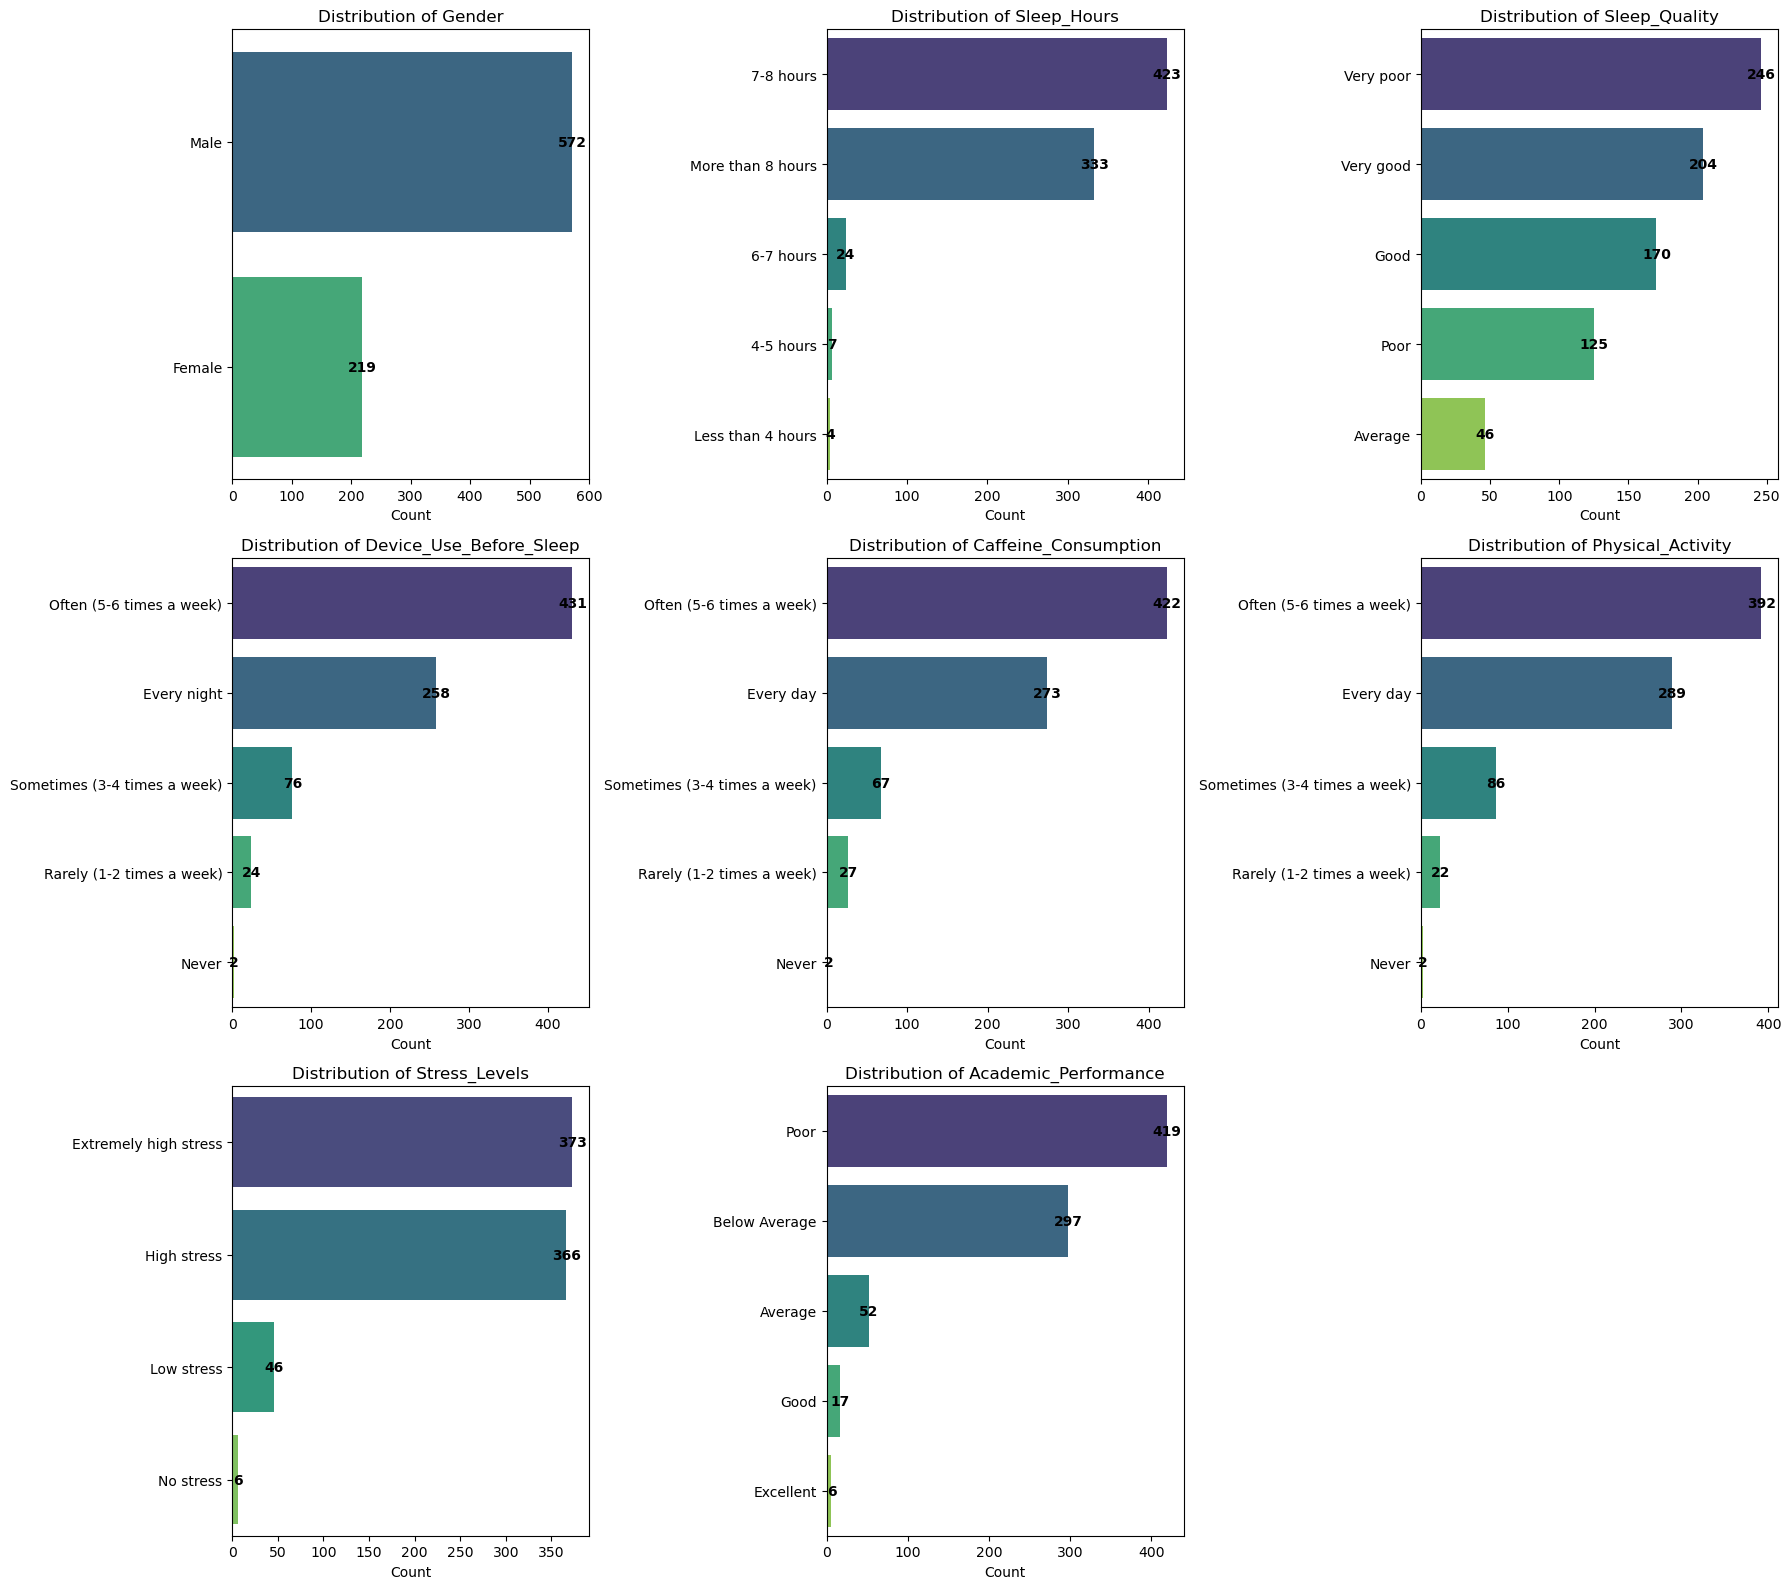

In [5]:
# Function to plot horizontal bar charts for the specified columns and display the distribution values
def plot_horizontal_bar_charts(df, columns):
    # Calculate grid size: 3 columns per row, automatically adjusting the number of rows
    n_cols, n_rows = 3, -(-len(columns) // 3)  # Round up for the number of rows
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(18, 16))  # Create subplots
    axes = axes.flatten()  # Flatten axes array to easily index each subplot
    
    # Iterate through the specified columns to create bar charts
    for i, col in enumerate(columns):
        # Get the value counts (frequency) of each unique value in the column
        value_counts = df[col].value_counts()
        
        # Plot a horizontal bar chart with value counts
        sns.barplot(
            y=value_counts.index,  # Y-axis represents the unique values
            x=value_counts.values,  # X-axis represents the frequency/counts
            ax=axes[i],  # Target the specific subplot
            palette="viridis"  # Set color palette for the bars
        )
        
        # Annotate each bar with the count value for better readability
        for j, value in enumerate(value_counts.values):
            axes[i].text(
                value + 0.2, j, f'{value}',  # Position the text slightly to the right of the bars
                ha='center', va='center', fontweight='bold', fontsize=10  # Customize text appearance
            )
        
        # Set the title and labels for the plot
        axes[i].set_title(f'Distribution of {col}')  # Title of the chart
        axes[i].set_xlabel('Count')  # Label for the x-axis (frequency)
        axes[i].set_ylabel('')  # No label for the y-axis (unique values are already shown)
        
        # Print the distribution values to the console for easy reference
        print(f"\nDistribution of {col}:")
        print(value_counts)  # Display the value counts for the current column
    
    # Remove any unused subplots if there are fewer columns than the grid size
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])  # Remove extra subplots that are not being used
    
    # Adjust layout to ensure the plots do not overlap
    plt.tight_layout()
    # Display the plots
    plt.show()

# List of columns to analyze
columns = [
    "Gender", "Sleep_Hours", "Sleep_Quality", "Device_Use_Before_Sleep", 
    "Caffeine_Consumption", "Physical_Activity", "Stress_Levels", "Academic_Performance"
]

# Call the function to plot horizontal bar charts and display distributions
plot_horizontal_bar_charts(df, columns)

# **Data-Preprocessing**

In order for the data to be in a format that can be anaylsed, pre-processing is performed to prepare the data. The key steps taken in pre-processing the data are as follows:

### 1. Encoding Gender
- **Gender:** One-hot encoding was applied to the 'Gender' column to convert it into a numerical format suitable for analysis. The `Gender_Male` was created, representing 1 for male and 0 for female.

### 2. Mapping Categories to Numerical Values
Due to the nature of the survey responses have inherent levels, they can be mapped to numerical scales. This step was necessary to enable the model to learn and recognize patterns. Mappings were applied to:

- **Sleep Hours**: Mapped to average numerical hours based on the range.
- **Sleep Quality**: Transformed from descriptive categories (e.g., "Very poor," "Good") to numerical scores.
- **Device Use Before Sleep**: Converted frequency-based categories to numerical values.
- **Caffeine Consumption**: Mapped consumption frequency to numerical values.
- **Physical Activity**: Transformed activity frequency to a numerical scale.
- **Stress Levels**: Converted stress intensity to numerical values.
- **Academic Performance**: Mapped performance levels (e.g., "Excellent," "Poor") to numerical scores.

### 3. Data Standardization
- `StandardScaler` was applied to standardize the features. This step alters the data so that the mean is 0 and the standard deviation becomes 1, preventing any feature with larger values to dominate the model (GeeksforGeeks, 2024).

### 4. Train-Test Split
The dataset was split into training (80%) and testing (20%) sets to evaluate the model's generalization.

In [6]:
# 1) One-hot encoding for 'Gender'
df_clean = pd.get_dummies(df_clean, columns=['Gender'], drop_first=True)  # Drop 'Male' to avoid multicollinearity

# 2) Mapping categorical values to numerical values for other columns

# Sleep_Hours mapping to actual number of hours
sleep_hours_mapping = {
    "More than 8 hours": 8.5,
    "7-8 hours": 7.5,
    "6-7 hours": 6.5,
    "4-5 hours": 4.5,
    "Less than 4 hours": 3.5
}
df_clean['Sleep_Hours'] = df_clean['Sleep_Hours'].map(sleep_hours_mapping)

# Sleep_Quality mapping to numerical values
sleep_quality_mapping = {
    "Very poor": 1,
    "Poor": 2,
    "Average": 3,
    "Good": 4,
    "Very good": 5
}
df_clean['Sleep_Quality'] = df_clean['Sleep_Quality'].map(sleep_quality_mapping)

# Device_Use_Before_Sleep mapping
device_use_mapping = {
    "Never": 0,
    "Rarely (1-2 times a week)": 1,
    "Sometimes (3-4 times a week)": 2,
    "Often (5-6 times a week)": 3,
    "Every night": 4
}
df_clean['Device_Use_Before_Sleep'] = df_clean['Device_Use_Before_Sleep'].map(device_use_mapping)

# Caffeine_Consumption mapping
caffeine_consumption_mapping = {
    "Never": 0,
    "Rarely (1-2 times a week)": 1,
    "Sometimes (3-4 times a week)": 2,
    "Often (5-6 times a week)": 3,
    "Every day": 4
}
df_clean['Caffeine_Consumption'] = df_clean['Caffeine_Consumption'].map(caffeine_consumption_mapping)

# Physical_Activity mapping
physical_activity_mapping = {
    "Never": 0,
    "Rarely (1-2 times a week)": 1,
    "Sometimes (3-4 times a week)": 2,
    "Often (5-6 times a week)": 3,
    "Every day": 4
}
df_clean['Physical_Activity'] = df_clean['Physical_Activity'].map(physical_activity_mapping)

# Stress_Levels mapping
stress_levels_mapping = {
    "No stress": 0,
    "Low stress": 1,
    "High stress": 2,
    "Extremely high stress": 3
}
df_clean['Stress_Levels'] = df_clean['Stress_Levels'].map(stress_levels_mapping)

# Academic_Performance mapping
academic_performance_mapping = {
    "Excellent": 5,
    "Good": 4,
    "Average": 3,
    "Below Average": 2,
    "Poor": 1
}
df_clean['Academic_Performance'] = df_clean['Academic_Performance'].map(academic_performance_mapping)

# 3) Reordering the columns to have 'Gender' first, then the other factors, and 'Academic_Performance' at the end
final_df = df_clean[[
    'Gender_Male', 'Sleep_Hours', 'Sleep_Quality', 
    'Device_Use_Before_Sleep', 'Caffeine_Consumption', 'Physical_Activity', 
    'Stress_Levels', 'Academic_Performance'
]]

# Display the first few rows of the final dataframe
print(final_df.head(10))

   Gender_Male  Sleep_Hours  Sleep_Quality  Device_Use_Before_Sleep  \
0            1          7.5              4                        3   
1            1          7.5              4                        2   
2            0          7.5              4                        3   
3            1          8.5              2                        2   
4            1          7.5              5                        2   
5            1          7.5              5                        2   
6            1          7.5              4                        1   
7            1          8.5              4                        3   
8            1          8.5              3                        1   
9            1          8.5              5                        3   

   Caffeine_Consumption  Physical_Activity  Stress_Levels  \
0                     1                  2              2   
1                     2                  2              1   
2                     3            

In [7]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 791 entries, 0 to 790
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender_Male              791 non-null    uint8  
 1   Sleep_Hours              791 non-null    float64
 2   Sleep_Quality            791 non-null    int64  
 3   Device_Use_Before_Sleep  791 non-null    int64  
 4   Caffeine_Consumption     791 non-null    int64  
 5   Physical_Activity        791 non-null    int64  
 6   Stress_Levels            791 non-null    int64  
 7   Academic_Performance     791 non-null    int64  
dtypes: float64(1), int64(6), uint8(1)
memory usage: 44.2 KB


In [8]:
final_df.describe()

,Gender_Male,Sleep_Hours,Sleep_Quality,Device_Use_Before_Sleep,Caffeine_Consumption,Physical_Activity,Stress_Levels,Academic_Performance
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,0.723135,7.843869,2.950695,3.161820,3.184576,3.193426,2.398230,1.601770
std,0.447732,0.703038,1.627718,0.735438,0.745494,0.755910,0.634012,0.769315
min,0.000000,3.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,7.500000,1.000000,3.000000,3.000000,3.000000,2.000000,1.000000
50%,1.000000,7.500000,3.000000,3.000000,3.000000,3.000000,2.000000,1.000000
75%,1.000000,8.500000,5.000000,4.000000,4.000000,4.000000,3.000000,2.000000
max,1.000000,8.500000,5.000000,4.000000,4.000000,4.000000,3.000000,5.000000


In [9]:
# List of feature columns (excluding the target column 'Academic_Performance')
features = ['Gender_Male', 'Sleep_Hours', 'Sleep_Quality', 
            'Device_Use_Before_Sleep', 'Caffeine_Consumption', 
            'Physical_Activity', 'Stress_Levels']

# Target column: 'Academic_Performance' is the variable we want to predict
y = final_df[['Academic_Performance']]  # Target variable

# Select feature columns from the DataFrame
X = final_df[features]  # Feature matrix

# Initialize the StandardScaler to standardize the feature data
scaler = StandardScaler()

# Apply scaling to the features: This helps to normalize the data for machine learning models
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets to confirm the split
print(f"Training features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

# Optionally, print the distribution of the target variable in the training data
print("\nDistribution of target variable in training data:")
print(y_train.value_counts())

Training features shape: (632, 7)
Test features shape: (159, 7)
Training labels shape: (632, 1)
Test labels shape: (159, 1)

Distribution of target variable in training data:
Academic_Performance
1                       337
2                       237
3                        41
4                        12
5                         5
dtype: int64


# **Model Building**

In this part, I go onto the building of the various regresion models as to compare their performance and compare the accuracies of these models, as well as the importance it places on the various features.

The models I have built are as follow:

1. **Ridge Regression**

2. **Random Forest**

3. **Boosting**

4. **Neural Network**

### Hyperparameter Tuning
These models have various strengths and weaknesses, thus they may be able to provide a different insight into the data. These different models have differing hyperparameters that need tuning to optimise the models' performance. However, with such a large number of permutations of parameters, I have used **GridSearchCV** to find the best performing parameters.

**GridSearchCV** automates the search for the best hyperparameters by exhaustively testing combinations and evaluating model performance using cross-validation. This helps optimize the model's predictive accuracy. It functions as such:

- **Parameter Grid:** A range of values for hyperparameters is put into a list. This differes depending on the model being tuned.
- **Cross-Validation:** The model is trained and evaluated multiple times. K-Fold Validation with 5 folds was used for all models.
- **Evaluation:** The best combination is selected based on a negative MSE since it is a measure of the extent of validation error.
- **Best Model:** The optimal model and hyperparameters are chosen for better performance.

### Model Evaluation

The performance of all the models were evaluated using these two parameters:

- **Mean Squared Error (MSE):** 
   - MSE measures the average squared differences between predicted and actual values. It penalizes larger errors more significantly, making it especially useful when large prediction errors are undesirable. This metric is particularly helpful in regression tasks where we want to minimize the difference between the predicted and actual outcomes. A lower MSE indicates that the model's predictions are closer to the actual values, thus demonstrating better performance (Padhma, 2024).

- **R-squared (R²):**
   - R² represents the proportion of variance in the target variable that the model explains. It is a key metric to evaluate the goodness-of-fit of a model. A value closer to 1 indicates that the model is able to explain most of the variation in the target variable, implying a better model fit. R² helps in understanding how well the model captures the underlying patterns in the data, and whether the chosen features are adequate for the prediction task (Frost, n.d.).

In addition to these evaluation metrics, the importance of each feature to the overall model performance was also assessed. This allows for an investigation into which lifestyle choices had the most significant impact on academic performance, providing valuable insights into the data and guiding future decisions on interventions or focus areas.


## Model 1: Ridge Regression

### Introduction

Linear regression is a statistical method that models the relationship between a dependent variable (target) and multiple independent variables (features). The model fits a line (or hyperplane in higher dimensions) that minimizes the sum of squared errors between the predicted and actual values. Ridge regression is a variant that adds regularization to penalize large coefficients, helping to avoid overfitting (Murel, 2023).

### Hyperparameters and Tuning

The primary hyperparameter in Ridge regression is **alpha**, which controls the strength of regularization:
- **Low alpha values**: Less regularization, which allows the model to better fit the training data but may lead to overfitting.
- **High alpha values**: Stronger regularization, which simplifies the model and reduces the risk of overfitting but may result in underfitting if set too high.
 
### Best Hyperparameters

- **alpha:** 100

### Model Evaluation

- **MSE:** 0.58
- **R²:** 0.08

### Feature Importance

- **Gender_Male (0.0192):** Slight positive correlation, indicating that being male has a small, positive effect on academic performance in this model.
- **Sleep_Quality (-0.0143):** Negative correlation, suggesting that higher sleep quality slightly decreases academic performance, though the effect is small.
- **Physical_Activity (-0.0435):** Negative correlation, meaning that more physical activity slightly lowers academic performance in this model.
- **Sleep_Hours (-0.0484):** Negative correlation, indicating that more sleep hours are slightly associated with lower academic performance in this context.
- **Stress_Levels (-0.0737):** Negative correlation, suggesting that higher stress levels have a negative impact on academic performance.
- **Device_Use_Before_Sleep (-0.0881):** Strong negative correlation, showing that more device use before sleep significantly decreases academic performance.
- **Caffeine_Consumption (-0.1479):** Strong negative correlation, meaning that higher caffeine consumption is associated with lower academic performance.

In [ ]:
# Define the list of feature columns (excluding the target column 'Academic_Performance')
features = ['Gender_Male', 'Sleep_Hours', 'Sleep_Quality', 
            'Device_Use_Before_Sleep', 'Caffeine_Consumption', 
            'Physical_Activity', 'Stress_Levels']

# Define the target column for the prediction, which is 'Academic_Performance'
target_column = ['Academic_Performance']

# Separate the features (X) and the target variable (y) from the final DataFrame
X = final_df[features]  # Feature matrix with input data
y = final_df[target_column]  # Target variable (what we want to predict)

# Initialize StandardScaler to standardize the feature data (scaling improves model performance)
scaler = StandardScaler()

# Scale the features to have zero mean and unit variance for better performance in models
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% training data, 20% test data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Function to evaluate the model performance using Mean Squared Error (MSE) and R-squared (R²)
def evaluate_model(y_true, y_pred, target_name):
    # Calculate Mean Squared Error (MSE) and R-squared (R²) for the predicted vs actual values
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    # Print the evaluation metrics
    print(f"{target_name} Metrics:")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  R-squared (R2): {r2:.2f}\n")
    
    # Return the calculated metrics in a dictionary
    return {"MSE": mse, "R2": r2}

# Function to display model coefficients for each feature (helpful for understanding model behavior)
def display_coefficients(model, feature_names):
    print("\nCoefficients (sorted from highest positive to most negative):")
    coefficients = model.coef_  # Retrieve the coefficients for the features
    
    # Sort the coefficients with the corresponding feature names
    coef_with_features = sorted(zip(feature_names, coefficients[0]), key=lambda x: x[1], reverse=True)
    
    # Display each feature and its corresponding coefficient
    for feature, coef in coef_with_features:
        print(f"  {feature}: {coef:.4f}")

# Function to plot actual vs predicted values (helps visualize model performance)
def plot_actual_vs_predicted(y_true, y_pred, target_name):
    plt.figure(figsize=(7, 6))  # Set figure size for the plot
    
    # Scatter plot of actual vs predicted values
    plt.scatter(y_true, y_pred, label='Predicted vs Actual', alpha=0.6)
    
    # Plot a reference line (perfect prediction line) for comparison
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r-', lw=2, label='Perfect Prediction')
    
    # Add labels and title to the plot
    plt.xlabel(f"Actual {target_name}")
    plt.ylabel(f"Predicted {target_name}")
    plt.title(f"Actual vs Predicted {target_name}")
    plt.legend()  # Display legend for the plot
    plt.show()  # Show the plot

# Function to perform Ridge Regression with GridSearchCV for hyperparameter tuning
def ridge_regression(X_train, y_train, X_test, y_test, feature_names, target_name):
    # Define a grid of alpha values for Ridge regularization to find the best alpha
    alpha_grid = {'alpha': [round(i * 0.01, 2) for i in range(1, 11)] + 
                  [i for i in range(1, 11)] + [round(i * 0.1, 1) for i in range(1, 11)] + 
                  [i * 10 for i in range(1, 11)]}
    
    # Initialize Ridge regressor
    ridge_regressor = Ridge()
    
    # Use GridSearchCV to search for the best alpha using cross-validation and negative mean squared error (MSE)
    grid_search = GridSearchCV(
        ridge_regressor, 
        param_grid=alpha_grid, 
        cv=5,  # 5-fold cross-validation
        scoring='neg_mean_squared_error'  # Scoring based on negative MSE (lower MSE is better)
    )
    
    # Fit the grid search to the training data to find the best model and hyperparameters
    grid_search.fit(X_train, y_train)

    # Retrieve the best model and the best alpha value from GridSearchCV
    best_model = grid_search.best_estimator_
    best_alpha = grid_search.best_params_['alpha']
    print(f"Best alpha from GridSearchCV: {best_alpha}\n")
    
    # Predict on the test set using the best model
    y_pred = best_model.predict(X_test)
    
    # Evaluate the model using the actual vs predicted values
    evaluate_model(y_test, y_pred, target_name)
    
    # Display the sorted coefficients to understand the influence of each feature
    display_coefficients(best_model, feature_names)
    
    # Plot the actual vs predicted values to visualize model performance
    plot_actual_vs_predicted(y_test, y_pred, target_name)

# Run Ridge regression for the target 'Academic_Performance' using the defined functions
ridge_regression(X_train, y_train, X_test, y_test, features, target_column[0])

## Model 2: Random Forest Regression

### Introduction

Random Forest is an ensemble learning method that creates multiple decision trees during training and outputs the average prediction of all trees for regression tasks. By combining many trees, Random Forest helps capture complex patterns in data and reduces the risk of overfitting compared to regular decision trees.

### Hyperparameters and Tuning

- **n_estimators**: The number of trees in the forest. More trees improve performance but increase computation time.
- **max_depth**: The maximum depth of each tree. Deeper trees can capture more complex patterns but may lead to overfitting.
- **min_samples_split**: The minimum number of samples required to split an internal node. Higher values prevent overfitting.
- **min_samples_leaf**: The minimum number of samples required at each leaf node. This can help smooth the model.
- **bootstrap**: Whether to use bootstrapped samples when building trees, which introduces randomness into the model (Pramod, 2023).

### Best Hyperparameters

- **bootstrap:** true  
- **max_depth:** 10 
- **min_samples_leaf:** 10
- **min_samples_split:** 2
- **n_estimators:** 200

### Model Evaluation

- **MSE:** 0.59
- **R²:** 0.06

### Feature Importance

- **Caffeine_Consumption (0.4502):** Strong negative impact, suggesting that higher caffeine consumption decreases academic performance.
- **Device_Use_Before_Sleep (0.1521):** Strong negative correlation, indicating that more device use before sleep significantly reduces academic performance.
- **Stress_Levels (0.0952):** Negative correlation, with higher stress levels negatively affecting academic performance.
- **Sleep_Quality (0.1311):** Slight negative effect, indicating that better sleep quality slightly reduces performance in this model.
- **Sleep_Hours (0.0596):** Small negative correlation, where more sleep hours are slightly associated with lower academic performance.
- **Physical_Activity (0.0791):** Minor negative effect, indicating that more physical activity slightly decreases academic performance.
- **Gender_Male (0.0328):** Small positive impact, suggesting that being male has a minor, positive effect on academic performance.

In [ ]:
# 1. Function to train and evaluate the base Random Forest model
def train_and_evaluate_rf(X_train, y_train, X_test, y_test):
    """
    Trains a Random Forest Regressor model and evaluates its performance on the test set.
    
    Parameters:
    - X_train: Training features
    - y_train: Training target variable
    - X_test: Test features
    - y_test: Test target variable
    
    Returns:
    - rf_model: The trained Random Forest model
    - mse: Mean Squared Error on the test set
    - r2: R-squared score on the test set
    """
    # Initialize and train the Random Forest model (no GridSearch here)
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # Fit the model
    rf_model.fit(X_train, y_train)

    # Predict the target variable on the test set
    y_pred = rf_model.predict(X_test)

    # Calculate Mean Squared Error (MSE) and R-squared (R2) for the evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return rf_model, mse, r2


# 2. Function to tune hyperparameters of the Random Forest model using GridSearchCV
def tune_rf_model(X_train, y_train):
    """
    Tunes hyperparameters of the Random Forest Regressor using GridSearchCV to find the best parameters.
    
    Parameters:
    - X_train: Training features
    - y_train: Training target variable
    
    Returns:
    - best_rf_model: The best model from GridSearchCV with tuned hyperparameters
    - best_params: The best hyperparameters found by GridSearchCV
    """
    # Convert y_train to a 1D array if it isn't already
    y_train = y_train.values.ravel() if hasattr(y_train, "values") else y_train

    # Define the hyperparameter grid to search
    param_grid = {
        'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
        'max_depth': [10, 20, 30, 50, None],         # Maximum depth of the trees
        'min_samples_split': [2, 5, 10, 15],         # Minimum samples required to split a node
        'min_samples_leaf': [1, 2, 5, 10],           # Minimum samples required to be a leaf node
        'bootstrap': [True]                          # Whether bootstrap samples are used when building trees
    }

    # Suppress warnings for undefined metrics and data conversion
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=DataConversionWarning)

        # Initialize GridSearchCV to search for the best hyperparameters
        grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                                   param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
        grid_search.fit(X_train, y_train)

    # Return the best model and best hyperparameters
    return grid_search.best_estimator_, grid_search.best_params_


# 3. Function to plot feature importance from the trained Random Forest model
def plot_feature_importance(rf_model, X):
    """
    Plots the feature importances from the Random Forest model to visualize which features 
    are most influential in predicting the target variable.
    
    Parameters:
    - rf_model: The trained Random Forest model
    - X: Feature matrix (used to label the features in the plot)
    """
    # Extract feature importances from the model
    importances = rf_model.feature_importances_

    # Create a DataFrame to store feature names and their corresponding importances
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

    # Print the feature importances for each feature
    print("\nFeature Importance Values:")
    for feature, importance in zip(feature_importance_df['Feature'], feature_importance_df['Importance']):
        print(f"{feature}: {importance:.4f}")

    # Plot the feature importances using a horizontal bar chart
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
    plt.title('Feature Importance from Random Forest')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()


# 4. Function to print the evaluation metrics for the base model
def print_metrics(mse, r2):
    """
    Prints the evaluation metrics for the base model.
    
    Parameters:
    - mse: Mean Squared Error of the model on the test set
    - r2: R-squared score of the model on the test set
    """
    print(f"Base Model (Academic_Performance):")
    print(f"MSE: {mse}")
    print(f"R2: {r2}")


# 5. Function to print the evaluation metrics for the tuned model
def print_tuned_metrics(mse_best, r2_best):
    """
    Prints the evaluation metrics for the tuned model.
    
    Parameters:
    - mse_best: Mean Squared Error of the tuned model on the test set
    - r2_best: R-squared score of the tuned model on the test set
    """
    print(f"\nTuned Model (Academic_Performance):")
    print(f"MSE: {mse_best}")
    print(f"R2: {r2_best}")


# Main execution starts directly
start_time = time.time()

# Train and evaluate the base Random Forest model
rf_model, mse, r2 = train_and_evaluate_rf(X_train, y_train, X_test, y_test)
print_metrics(mse, r2)

# Perform hyperparameter tuning using GridSearchCV
best_rf_model, best_params = tune_rf_model(X_train, y_train)
print(f'\nBest Parameters: {best_params}')

# Evaluate the tuned Random Forest model
y_pred_best = best_rf_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the metrics for the tuned model
print_tuned_metrics(mse_best, r2_best)

# Plot feature importance from the tuned model
plot_feature_importance(best_rf_model, X)

# End the timer and print execution time
end_time = time.time()
print(f"\nExecution Time: {end_time - start_time:.2f} seconds")

## Model 3: Boosting with XGBoost

### Introduction

XGBoost (Extreme Gradient Boosting) is a powerful ensemble learning method that builds decision trees sequentially to minimize prediction errors. It employs gradient boosting techniques and advanced regularization to enhance accuracy and prevent overfitting (Analytics Vidhya, 2024).

### Hyperparameters and Tuning

The following key hyperparameters were optimized to improve the model's performance:
- **learning_rate:** Determines the contribution of each tree. Lower values help prevent overfitting by slowing down learning.
- **n_estimators:** Specifies the number of trees in the model. A higher value improves accuracy but increases training time.
- **max_depth:** Limits the depth of trees. Deeper trees can capture complex patterns but risk overfitting.
- **subsample:** Fraction of samples used to build each tree. Lower values introduce randomness, reducing overfitting.
- **colsample_bytree:** Fraction of features considered for building each tree, increasing model diversity.
- **gamma:** Minimum loss reduction required to split a node. Higher values create a more conservative model.

### Best Hyperparameters

- **colsample_bytree:** 0.8  
- **gamma:** 0.2  
- **learning_rate:** 0.01  
- **max_depth:** 3  
- **n_estimators:** 200  
- **subsample:** 0.8  

### Model Evaluation

- **MSE:** 0.5890  
- **R²:** 0.0713  

### Feature Importance

- **Caffeine_Consumption (0.3166):** This is the most influential feature, showing that higher caffeine intake associated with lower academic performance.
- **Device_Use_Before_Sleep (0.1789):** This is a significant predictor, showing that increased device use before sleep is assocaited with lower academic performance.
- **Stress_Levels (0.1449):** An important factor but to a lesser degree, shwoing higher stress levels leads to worse academic performance.
- **Sleep_Hours (0.1067):** Moderately important, suggesting more sleep hours are weakly associated with slightly lower academic performance.
- **Physical_Activity (0.1026):** A minor contributor, with more physical activity slightly reducing academic performance.
- **Sleep_Quality (0.0883):** A smaller contributor, with better sleep quality slightly associated with lower performance.
- **Gender_Male (0.0620):** The least important feature, showing that gender has little impact on academic performance.

### Correlation

- **Caffeine_Consumption (-0.3285):** Strong negative correlation, meaning that higher caffeine consumption is associated with lower academic performance.
- **Device_Use_Before_Sleep (-0.2842):** Strong negative correlation, indicating that more device use before sleep negatively impacts academic performance.
- **Stress_Levels (-0.2610):** Negative correlation, suggesting that higher stress levels decrease academic performance.
- **Sleep_Quality (-0.0309):** Slight negative correlation, indicating that higher sleep quality has a minimal impact on academic performance in this model.
- **Sleep_Hours (-0.1888):** Moderate negative correlation, suggesting that more sleep hours are weakly associated with lower academic performance.
- **Physical_Activity (-0.2418):** Negative correlation, meaning that more physical activity slightly decreases academic performance.
- **Gender_Male (-0.0375):** Small negative impact, suggesting that being male has a very minor negative effect on academic performance.

In [ ]:
# Define feature columns and the target column
features = ['Gender_Male', 'Sleep_Hours', 'Sleep_Quality', 
            'Device_Use_Before_Sleep', 'Caffeine_Consumption', 
            'Physical_Activity', 'Stress_Levels']

y = final_df[['Academic_Performance']]  # Target variable
X = final_df[features]  # Feature matrix

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize XGBoost model and GridSearchCV for hyperparameter tuning
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=0)

# Fit the model with the best hyperparameters
grid_search.fit(X_train, y_train)

# Display best hyperparameters found by GridSearchCV
print("\nBest Hyperparameters Found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

# Make predictions with the best model and evaluate performance
y_pred_best = grid_search.best_estimator_.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print evaluation metrics (MSE and R² score)
print("\nBest Model Evaluation Metrics:")
print(f"  Mean Squared Error: {mse_best:.4f}")
print(f"  R^2 Score: {r2_best:.4f}")

# Extract feature importance from the best model
importance = grid_search.best_estimator_.feature_importances_

# Sort the features by importance and display the results
sorted_idx = importance.argsort()[::-1]  # Sort indices in descending order
sorted_features = [features[i] for i in sorted_idx]  # Sorted feature names
sorted_importance = importance[sorted_idx]  # Sorted importance values

# Plot feature importance as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='royalblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance in XGBoost Model')

# Annotate the bars with their numerical values
for i, v in enumerate(sorted_importance):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center', fontweight='bold')

# Display the plot
plt.tight_layout()
plt.show()

# Display the feature importance values in descending order
print("\nFeature Importance Values (in descending order):")
print("-" * 50)
for feature, imp_value in zip(sorted_features, sorted_importance):
    print(f"{feature.ljust(25)}: {imp_value:.4f}")
print("-" * 50)

# Calculate and print the correlation of each feature with the target variable
correlation_matrix = final_df.corr()
print("\nCorrelation with Target 'Academic_Performance':")
print("-" * 50)
for feature in features:
    correlation_value = correlation_matrix.loc[feature, 'Academic_Performance']
    print(f"{feature.ljust(25)}: {correlation_value:.4f}")
print("-" * 50)

## Model 4: Neural Network (Feedforward Neural Network)

### Introduction to Neural Networks

Feedforward Neural Networks (FFNN) are a type of artificial neural network in which information flows in one direction, from the input to the output. It consists of an input layer, hidden layers and output layer (GeekforGeeks, 2024). FFNN are popular models owing to their high range of customization and ability to be used for all kinds of machine learning problems including classification, regression and prediction. 

In this model, I have used MLP Regressor, which stands for Multi-Layer Perceptron Regressor. It is an inbuilt feed-forward neural network model in the sklearn library, specifically used for regression tasks.

### Hyperparameters and Tuning

These features are being tuned and optimized:

- **hidden_layer_sizes:** Number and size of hidden layers in the network.
- **activation:** Activation function to introduce non-linearity.  **relu** (rectified linear unit) and **tanh** were chosen.
- **learning_rate_init:** Initial learning rate for the optimizer.
- **alpha:** L2 regularization strength to prevent overfitting.

These features below are kept constant and are defined:

- **max_iter:** Maximum number of iterations for training. This is fixed at 2000 to ensure convergence.
- **early_stopping:** Enables stopping the training when validation performance does not improve, reducing computation complexity and overfitting.
- **n_iter_no_change:** Number of iterations with no improvement before stopping. This is set at 10.

### Best Hyperparameters

- **hidden_layer_sizes:** (100,) --> This indicates a single hidden layer with 100 neurons
- **activation:** relu
- **learning_rate_init:** 0.01
- **alpha:** 0.0005

### Model Evaluation

- **MSE:** 0.491
- **R²:** 0.193  

### Feature Importance and Correlation Factors

In addition to the feature importance, SHapley Additive exPlanations (SHAP) was used to analyse the model and determine the importance of each feature and whether the correlation was negative or positive (Awan, 2023).

- **Caffeine_Consumption (0.0612):** Strong negative impact, suggesting that higher caffeine consumption decreases academic performance.
- **Sleep_Quality (0.0586):** Positive impact, indicating that better sleep quality is slightly associated with better academic performance.
- **Physical_Activity (0.0582):** Strong negative impact, suggesting that higher physical activity decreases academic performance.
- **Sleep_Hours (0.0476):** Positive impact, indicating that more sleep hours slightly enhance academic performance.
- **Device_Use_Before_Sleep (0.0392):** Negative impact, suggesting that more device use before sleep decreases academic performance.
- **Stress_Levels (0.0193):** Positive impact, suggesting that higher stress levels slightly improve academic performance, though the effect is minimal.
- **Gender_Male (0.0038):** Minimal effect, with a very slight positive impact, indicating that being male has a minor positive effect on academic performance.

Training Progress: 100%|██████████| 1/1 [01:12 < 00:00, 72.08s/it]



Best parameters:
  activation: relu
  alpha: 0.008
  early_stopping: True
  hidden_layer_sizes: (70, 35)
  learning_rate_init: 0.007
  max_iter: 2000
  n_iter_no_change: 10
  solver: adam
  validation_fraction: 0.1

Best cross-validation MSE: 0.516
Best cross-validation R²: 0.098

Number of iterations before stopping: 23


Total training time: 72.09 seconds


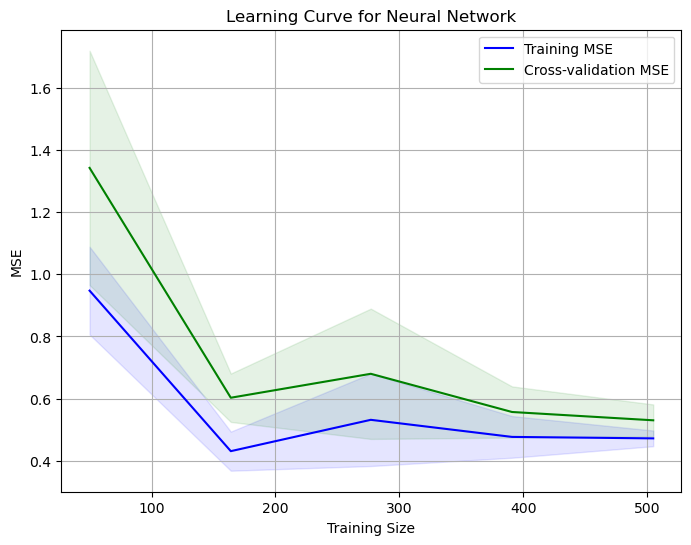


Calculating SHAP values for feature importance (this may take some time)...


100%|██████████| 100/100 [00:05<00:00, 19.50it/s]


Feature Importance (Mean Absolute SHAP Values):
Caffeine_Consumption: 0.1440
Stress_Levels: 0.0722
Device_Use_Before_Sleep: 0.0441
Physical_Activity: 0.0362
Sleep_Hours: 0.0338
Sleep_Quality: 0.0304
Gender_Male: 0.0252


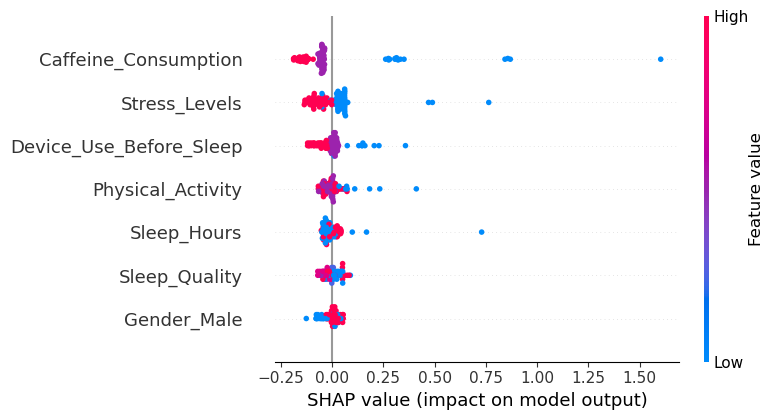

In [12]:
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV

def train_and_evaluate_ffnn(X_train, y_train):
    """
    Train a neural network model optimized for MSE and R² using GridSearchCV with a progress bar.
    """
    # Ensure y_train is a 1D array to avoid DataConversionWarning
    y_train = np.ravel(y_train)

    # Ensure X_train is a NumPy array for proper serialization
    X_train = np.array(X_train)

    # Initialize the neural network regressor
    ffnn = MLPRegressor(random_state=42)

    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'hidden_layer_sizes': [
            # Single layer sizes from 10 to 100 neurons in intervals of 10
            (10,), (20,), (30,), (40,), (50,), 
            (60,), (70,), (80,), (90,), (100,),
            
            # Double layer sizes, where second layer is half of the first layer
            (10, 5), (20, 10), (30, 15), (40, 20), (50, 25), 
            (60, 30), (70, 35), (80, 40), (90, 45), (100, 50)
        ],  
        'activation': ['relu'],  # Activation functions to test
        'learning_rate_init': [0.001, 0.003, 0.005, 0.007, 0.009, 0.01],  # Learning rate with doubled intervals
        'max_iter': [2000],  # Maximum number of training iterations
        'early_stopping': [True],  # Enable early stopping to prevent overfitting
        'validation_fraction': [0.1],  # Fraction of training data for validation
        'n_iter_no_change': [10],  # Stop training if no improvement for 10 epochs
        'solver': ['adam'],  # Solver for weight optimization
        'alpha': [0.0001, 0.0003, 0.0005, 0.0007, 0.0009, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]  # Alpha with doubled intervals
    }

    # Define the scoring metric for optimization (use neg_mean_squared_error for MSE)
    scoring = ['neg_mean_squared_error', 'r2']

    # Perform grid search with 5-fold cross-validation, with tqdm progress bar
    grid_search = GridSearchCV(
        ffnn,
        param_grid,
        cv=5,  # 5-fold cross-validation
        scoring=scoring,  # Optimize for MSE and R²
        n_jobs=-1,  # Use all available processors
        verbose=0,  # Suppress default verbose output
        refit='neg_mean_squared_error'  # Refit using MSE
    )

    # Use tqdm to show a progress bar while fitting the model
    with tqdm(total=1, desc="Training Progress", bar_format="{l_bar}{bar}| {n_fmt}/{total_fmt} [{elapsed} < {remaining}, {rate_fmt}]") as pbar:
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=UndefinedMetricWarning)
            warnings.simplefilter("ignore", category=DataConversionWarning)
            warnings.simplefilter("ignore", category=InconsistentVersionWarning)
            
            # Fit the model and update progress bar after fitting is done
            grid_search.fit(X_train, y_train)
            pbar.update(1)  # Update progress bar after the grid search fitting process

    # Extract the best model and its performance metrics
    best_model = grid_search.best_estimator_
    print("\nBest parameters:")
    for param, value in grid_search.best_params_.items():
        print(f"  {param}: {value}")
    
    # Add extra line spaces before the MSE and R² results
    print(f"\nBest cross-validation MSE: {-grid_search.best_score_:.3f}")  # Show MSE as positive
    print(f"Best cross-validation R²: {grid_search.cv_results_['mean_test_r2'][grid_search.best_index_]:.3f}")

    # Add extra line space before the number of iterations
    print(f"\nNumber of iterations before stopping: {best_model.n_iter_}\n")

    return best_model

def plot_learning_curve(model, X_train, y_train, title="Learning Curve"):
    """
    Generate and plot learning curves for a given model.
    """
    # Ensure y_train is a 1D array to avoid DataConversionWarning
    y_train = np.ravel(y_train)

    # Compute learning curve data
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
    )

    # Calculate mean and standard deviation for training and testing scores
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, -train_mean, label='Training MSE', color='blue')  # Show MSE as positive
    plt.plot(train_sizes, -test_mean, label='Cross-validation MSE', color='green')  # Show MSE as positive

    # Add shaded regions for standard deviation
    plt.fill_between(train_sizes, -train_mean - train_std, -train_mean + train_std, color='blue', alpha=0.1)
    plt.fill_between(train_sizes, -test_mean - test_std, -test_mean + test_std, color='green', alpha=0.1)

    plt.title(title)
    plt.xlabel('Training Size')
    plt.ylabel('MSE')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


def explain_with_shap(model, X_train, feature_names):
    """
    Use SHAP to explain the neural network's feature importance numerically.
    """
    # Select a single class to explain (e.g., the positive class for binary classification)
    class_idx = 1  # Change as needed for multi-class (0, 1, etc.)

    # Wrapper function for SHAP to work with a specific class
    def model_predict(X):
        return model.predict(X)  # For regression, use .predict

    # Create a SHAP KernelExplainer
    explainer = shap.KernelExplainer(model_predict, X_train[:100])

    # Calculate SHAP values for a subset of the training data
    print("\nCalculating SHAP values for feature importance (this may take some time)...")
    shap_values = explainer.shap_values(X_train[:100])  # Use a subset of the data for faster results

    # Compute mean absolute SHAP values for each feature
    mean_abs_shap = np.mean(np.abs(shap_values), axis=0)

    # Create a dictionary of features and their importance
    feature_importance = dict(zip(feature_names, mean_abs_shap))

    # Sort features by importance
    sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

    print("\nFeature Importance (Mean Absolute SHAP Values):")
    for feature, importance in sorted_importance:
        print(f"{feature}: {importance:.4f}")

    # Optionally, plot a summary for visual exploration
    shap.summary_plot(shap_values, X_train[:100], feature_names=feature_names)


# Start the timer to measure training time
start_time = time.time()

# Train and optimize the model for MSE and R²
best_ffnn_model = train_and_evaluate_ffnn(X_train, y_train)

# Calculate and display total training time
execution_time = time.time() - start_time
print(f"\nTotal training time: {execution_time:.2f} seconds")

# Plot the learning curve
plot_learning_curve(best_ffnn_model, X_train, y_train, title="Learning Curve for Neural Network")

# Explain feature importance with SHAP
feature_names = ['Gender_Male', 'Sleep_Hours', 'Sleep_Quality', 
                 'Device_Use_Before_Sleep', 'Caffeine_Consumption', 
                 'Physical_Activity', 'Stress_Levels']
explain_with_shap(best_ffnn_model, X_train, feature_names)

# **Final Evaluation**

### Best Model based on Evaluation Metrics

The following table summarizes the performance metrics for each model:

| **Model**            | **MSE**  | **R²**  |
|----------------------|----------|---------|
| **Linear Regression** | 0.58     | 0.08    |
| **Random Forest**     | 0.59     | 0.06    |
| **Boosting**          | 0.5890   | 0.0713  |
| **Neural Network**    | 0.491    | 0.193   |


The **Neural Network** model outperforms the other models with an MSE of 0.491 and an R² of 0.193, suggesting it captures more complex patterns in the data compared to the other models. **Linear Regression**, with an MSE of 0.58 and an R² of 0.08, shows the weakest fit. **Random Forest** and **Boosting** both yield similar MSE values (0.59 and 0.5890, respectively), with Random Forest bieng slightly worse. 

However, all models still have relatively low R² value, which could indicate a lack of complexity in the model or a lack of correlation in the features to the target variable. Some possible improvements that could improve this are as such:

1. **Feature Engineering:** This would refer to the creation of new features by combining past features. One example would perhaps be multiplying sleep quality and sleep hours as an overall measuer of sleep obtained by each student. By doing so, the models might be able to derive more meaningful relationships between the data and improve their performance.

2. **Increased Survey Results for High Performers:** In this data as shown, majority of students viewed their academic performance negatively. This could have led to bias in the models towards the lower classes and neglecting the better performing students. While utilising oversampling techniques such as SMOTE may seem to be helpful, the excessive class imbalance could like to a high amount of data leakage.




### Feature Importance

#### 1. **Linear Regression**

| **Feature**                 | **Feature Importance** | **Correlation**   |
|-----------------------------|------------------------|-------------------|
| Caffeine_Consumption         | 0.4502                 | <span style="color:red">Negative</span>     |
| Device_Use_Before_Sleep      | 0.1521                 | <span style="color:red">Negative</span>     |
| Stress_Levels                | 0.0952                 | <span style="color:red">Negative</span>     |
| Sleep_Quality                | 0.1311                 | <span style="color:red">Negative</span>     |
| Sleep_Hours                  | 0.0596                 | <span style="color:red">Negative</span>     |
| Physical_Activity            | 0.0791                 | <span style="color:red">Negative</span>     |
| Gender_Male                  | 0.0328                 | <span style="color:green">Positive</span>   |

#### 2. **Random Forest**

| **Feature**                 | **Feature Importance** | **Correlation**   |
|-----------------------------|------------------------|-------------------|
| Caffeine_Consumption         | 0.3166                 | <span style="color:red">Negative</span> |
| Device_Use_Before_Sleep      | 0.1789                 | <span style="color:red">Negative</span> |
| Stress_Levels                | 0.1449                 | <span style="color:red">Negative</span> |
| Sleep_Hours                  | 0.1067                 | <span style="color:red">Negative</span> |
| Physical_Activity            | 0.1026                 | <span style="color:red">Negative</span> |
| Sleep_Quality                | 0.0883                 | <span style="color:red">Negative</span> |
| Gender_Male                  | 0.0620                 | <span style="color:red">Negative</span> |

#### 3. **Boosting**

| **Feature**                 | **Feature Importance** | **Correlation**   |
|-----------------------------|------------------------|-------------------|
| Caffeine_Consumption         | 0.0612                 | <span style="color:red">Negative</span>     |
| Sleep_Quality                | 0.0586                 | <span style="color:green">Positive</span>   |
| Physical_Activity            | 0.0582                 | <span style="color:red">Negative</span>     |
| Sleep_Hours                  | 0.0476                 | <span style="color:green">Positive</span>   |
| Device_Use_Before_Sleep      | 0.0392                 | <span style="color:red">Negative</span>     |
| Stress_Levels                | 0.0193                 | <span style="color:green">Positive</span>   |
| Gender_Male                  | 0.0038                 | <span style="color:green">Positive</span>   |

#### 4. **Neural Network**

| **Feature**                 | **Feature Importance** | **Correlation**   |
|-----------------------------|------------------------|-------------------|
| Caffeine_Consumption         | 0.0612                 | <span style="color:red">Negative</span>     |
| Sleep_Quality                | 0.0586                 | <span style="color:green">Positive</span>   |
| Physical_Activity            | 0.0582                 | <span style="color:red">Negative</span>     |
| Sleep_Hours                  | 0.0476                 | <span style="color:green">Positive</span>   |
| Device_Use_Before_Sleep      | 0.0392                 | <span style="color:red">Negative</span>     |
| Stress_Levels                | 0.0193                 | <span style="color:green">Positive</span>   |
| Gender_Male                  | 0.0038                 | <span style="color:red">Negative</span>     |



**Caffeine_Consumption:** Across all models, caffeine consumption has the highest feature importance and has a negative correlation with academic performance. This is incredibly interesting since caffeine consumption is associated with better focus and alertness to study better. Hence, maybe drinking less caffeine may be a suggestion to bring up one's GPA.

**Device_Use_Before_Sleep:** Device use before sleep is not consistently seen as the most important model, being more relevant in linear regression and random forest. However, across all models, it has a negative correlation with academic performance. This indicates that using one's phone before sleeping is actively detrimental to academic performance due to it affecting one's sleep.

**Stress_Levels:** Interestingly, stress levels  is rather inconsistent across all models, having negative correlation in the linear regression and random forest models but positive in boosting and neural network. However, since neural network has been determined as the best performing model, the positive correlation seems more legitimate, but is still inconclusive.

**Sleep_Hours:** Similar to the stress levels, sleep hours has negative correlations in the linear regression and random forest but positive in boosting and neural network. However, taking the neural network's positive correlation as legitimate, this makes sense as a healthy sleeping habit allows one to recover and study better due to improve focus and mental alertness.

**Physical_Activity:** Physical activity consistently has a negative correlation with academic performance. So does that mean we should all stop exercising during finals? It's hard to say, it could mean that those who do not exercise spend more time studying.

**Sleep_Quality:** Similar to stress levels and sleep hours, has negative correlations in the linear regression and random forest but positive in boosting and neural network. The neural network model seems to be more sensible since better sleep quality improves study performance.

**Gender_Male:** In all models, gender appears to have little to no significance on academic performance. As such, this can easily be ruled out as inconsiquential in predicting academic performance.

## **Sources:**

1. Abdullah, A. (2024, November 18). Student Insomnia and Educational Outcomes Dataset. Mendeley Data. doi.org/10.17632/5mvrx4v62z.1

2. GeeksforGeeks. (2024, Feburary 9). What is StandardScaler?. https://www.geeksforgeeks.org/what-is-standardscaler/

3. Padhma. (2024, November 21). A Comprehensive Introduction to Evaluating Regression Models. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2021/10/evaluation-metric-for-regression-models/

4. Frost, J. (n.d.). How To Interpret R-squared in Regression Analysis. Stathttps://statisticsbyjim.com/regression/interpret-r-squared-regression/

5. Murel, J., Kavlakoglu, E. (2023, November 2023). What is Ridge Regression?. IBM. https://www.ibm.com/topics/ridge-regression

6. DataCamp. (2022, March 25). Lasso and Ridge Regression in Python Tutorial. https://www.datacamp.com/tutorial/tutorial-lasso-ridge-regression

7. Pramod, O. (2023, January 29). Decision Trees. Medium. https://medium.com/@ompramod9921/decision-trees-8e2391f93fa7

8. Analytics Vidhya. (2024, November 24). What is XGBoost Algorithm?. https://www.analyticsvidhya.com/blog/2018/09/an-end-to-end-guide-to-understand-the-math-behind-xgboost/

9. GeekforGeeks. (2024, June 20). Feedforward neural network. https://www.geeksforgeeks.org/feedforward-neural-network/

10. Awan, A. A. (2023, June 28). An Introduction to SHAP Values and Machine Learning Interpretability. DataCamp. https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability